In [1]:
#Dependencies
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
#Import Data

data_location = "NCHS_-_Leading_Causes_of_Death__United_States.csv"

#csv to pandas
data = pd.read_csv(data_location)

In [3]:
# removing the unwanted colums
data = data[['Year', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate']]
data.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,Kidney disease,Vermont,21,2.6
1,2016,Kidney disease,Vermont,30,3.7
2,2013,Kidney disease,Vermont,30,3.8
3,2000,Suicide,District of Columbia,23,3.8
4,2014,Kidney disease,Arizona,325,4.1


In [4]:
# sorting data by year
data = data.sort_values(['Year'], ascending=[True])
print(data.shape)
data.head()

(10296, 5)


,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
10295,1999,All causes,District of Columbia,6076,1087.3
1911,1999,Alzheimer's disease,Massachusetts,1182,16.5
6407,1999,CLRD,Iowa,1643,46.8
1906,1999,Kidney disease,West Virginia,345,16.4
8906,1999,Cancer,North Carolina,15815,207.1


In [5]:
# removing unwanted rows 
data_filtered = data.loc[data["Cause Name"] != "All causes"]
data_filtered = data_filtered.loc[data_filtered["State"] != "United States"]
print(data_filtered.shape)
data_filtered.head()

(9180, 5)


,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
1911,1999,Alzheimer's disease,Massachusetts,1182,16.5
6407,1999,CLRD,Iowa,1643,46.8
1906,1999,Kidney disease,West Virginia,345,16.4
8906,1999,Cancer,North Carolina,15815,207.1
5350,1999,CLRD,Connecticut,1435,37.8


In [6]:
data_filt_group = data_filtered.groupby(['Year', 'Cause Name']).sum()
data_filt_group = data_filt_group.sort_values(['Year'], ascending=[True])
data_filt_group = data_filt_group.reset_index()
table = data_filt_group.pivot_table(data_filt_group, index=['Year'], columns=['Cause Name'])
# data_filt_group.head()
table

Age-adjusted Death Rate                                          \
Cause Name     Alzheimer's disease    CLRD   Cancer Diabetes Heart disease   
Year                                                                         
1999                         892.7  2399.5  10274.6   1303.8       13059.4   
2000                         995.2  2336.4  10209.6   1305.1       12729.2   
2001                        1060.9  2321.0  10085.6   1318.2       12335.4   
2002                        1154.1  2336.6   9945.5   1335.1       12088.3   
2003                        1196.9  2317.1   9791.2   1330.3       11739.9   
2004                        1214.7  2204.6   9571.7   1286.2       10990.6   
2005                        1286.5  2344.8   9495.9   1293.9       10787.8   
2006                        1271.4  2187.0   9334.4   1227.0       10266.2   
2007                        1293.3  2198.2   9229.7   1197.3        9810.7   
2008                        1373.2  2392.4   9070.9   1149.0        9614.5   
2009                        1282.9  2294.1   8901.6   1098.9        9185.9   
2010                        1334.1  2261.9   8901.9   1088.7        9015.8   
2011                        1318.8  2289.3   8727.0   1132.2        8753.1   
2012                        1271.3  2222.7   8557.3   1095.1        8651.2   
2013                        1236.3  2256.4   8428.8   1091.5        8622.1   
2014                        1333.0  2193.8   8354.4   1080.4        8555.5   
2015                        1527.5  2262.9   8227.5   1126.3        8611.7   
2016                        1577.2  2201.3   8065.7   1096.8        8515.5   

                                                                   \
Cause Name Influenza and pneumonia Kidney disease  Stroke Suicide   
Year                                                                
1999                        1239.0          664.6  3205.8   599.9   
2000                        1185.6          701.4  3140.9   597.1   
2001                        1097.4          721.7  3019.7   618.5   
2002                        1172.9          732.8  2973.0   629.3   
2003                        1158.1          751.1  2837.8   623.0   
2004                        1008.4          743.9  2629.6   631.0   
2005                        1062.1          747.2  2488.5   627.7   
2006                         923.6          759.8  2316.9   632.9   
2007                         853.6          757.9  2238.8   645.6   
2008                         900.8          784.4  2179.3   670.2   
2009                         839.1          775.1  2064.0   670.6   
2010                         774.6          786.7  2035.5   705.0   
2011                         807.8          693.9  1969.0   712.5   
2012                         737.4          666.5  1916.0   736.8   
2013                         821.9          677.0  1869.0   736.3   
2014                         788.5          671.1  1876.5   760.2   
2015                         810.3          679.9  1912.4   786.6   
2016                         700.2          666.0  1895.3   794.8   

                                               Deaths                  \
Cause Name Unintentional injuries Alzheimer's disease    CLRD  Cancer   
Year                                                                    
1999                       1953.0               44536  124181  549838   
2000                       1960.8               49558  122009  553091   
2001                       2001.9               53852  123013  553768   
2002                       2061.6               58866  124816  557271   
2003                       2100.7               63457  126382  556902   
2004                       2116.4               65965  121987  553888   
2005                       2184.4               71599  130933  559312   
2006                       2233.6               72432  124583  559888   
2007                       2231.3               74632  127924  562875   
2008                       2207.6             

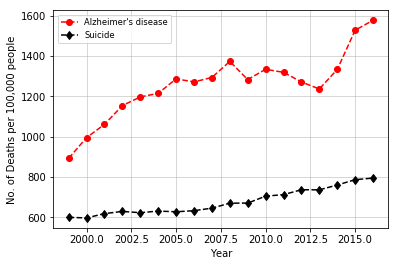

In [7]:
fig, ax = plt.subplots()

ax.errorbar(table.index, table["Age-adjusted Death Rate"]['Alzheimer\'s disease'], fmt="--o", color="r",
            alpha=1, label="Alzheimer's disease")
# ax.errorbar(table.index, table["Age-adjusted Death Rate"]['Cancer'], fmt="--^", color="b",
#             alpha=1, label="Cancer")
# ax.errorbar(table.index, table["Age-adjusted Death Rate"]['Heart disease'], fmt="--s", color="g",
#             alpha=1, label="Heart disease")
ax.errorbar(table.index, table["Age-adjusted Death Rate"]['Suicide'], fmt="--d", color="k",
            alpha=1, label="Suicide")

# ax.set_xlim((min(table_Tumor.index)-2), (max(table_Tumor.index)+2))

# ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Year")
ax.set_ylabel("No. of Deaths per 100,000 people")
ax.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save fig
# plt.savefig('Plots/Increasing causes of deaths')

plt.show()

In [8]:
list_of_states = []
list_of_states = data['State'].unique().tolist()
# list_of_states

In [29]:
print(data["State"].unique())
state = input("Pick a state from the list: ")

['District of Columbia' 'Massachusetts' 'Iowa' 'West Virginia'
 'North Carolina' 'Connecticut' 'Minnesota' 'Illinois' 'United States'
 'New Mexico' 'Texas' 'North Dakota' 'Virginia' 'Arkansas' 'Oklahoma'
 'Utah' 'South Dakota' 'Nebraska' 'Arizona' 'California' 'Montana'
 'Maryland' 'Louisiana' 'Pennsylvania' 'Alaska' 'Idaho' 'Wyoming'
 'Tennessee' 'Missouri' 'New Jersey' 'Kansas' 'Delaware' 'Wisconsin'
 'Mississippi' 'New Hampshire' 'Georgia' 'Colorado' 'Michigan' 'Alabama'
 'Vermont' 'Nevada' 'Indiana' 'Hawaii' 'Florida' 'Oregon' 'Washington'
 'Kentucky' 'South Carolina' 'Ohio' 'Maine' 'Rhode Island' 'New York']
Pick a state from the list: Washington


In [30]:
# Get the data for the specific state
data_state = data.loc[data["Cause Name"] != "All causes"]
data_state = data_state.loc[data_state["State"] == state]
print(data_state.shape)
data_state.head()

data_state_group = data_state.groupby(['Year', 'Cause Name']).sum()
data_state_group = data_state_group.sort_values(['Year'], ascending=[True])
data_state_group = data_state_group.reset_index()
table_state = data_state_group.pivot_table(data_state_group, index=['Year'], columns=['Cause Name'])
table_state

(180, 5)


Age-adjusted Death Rate                                      \
Cause Name     Alzheimer's disease  CLRD Cancer Diabetes Heart disease   
Year                                                                     
1999                          29.8  51.2  198.3     24.5         215.7   
2000                          33.4  49.3  195.8     24.5         209.7   
2001                          37.1  48.1  194.2     25.3         203.3   
2002                          39.0  48.6  190.6     26.3         196.4   
2003                          41.4  46.6  190.4     26.1         192.8   
2004                          37.9  43.8  184.6     25.3         179.3   
2005                          38.2  45.4  181.0     25.5         180.5   
2006                          39.3  43.5  175.3     24.7         168.4   
2007                          41.8  42.8  179.0     23.5         170.1   
2008                          47.1  45.6  175.5     24.1         164.0   
2009                          44.6  44.3  174.9     22.8         153.9   
2010                          43.6  40.4  170.5     21.6         151.5   
2011                          43.4  44.0  166.1     22.6         143.8   
2012                          43.8  41.0  161.4     22.4         139.3   
2013                          43.6  39.4  156.1     21.3         138.2   
2014                          43.6  37.9  155.5     21.2         137.2   
2015                          44.4  39.7  156.4     22.4         137.6   
2016                          40.7  37.3  150.9     20.3         136.1   

                                                                  \
Cause Name Influenza and pneumonia Kidney disease Stroke Suicide   
Year                                                               
1999                          23.7            5.2   69.9    14.0   
2000                          18.7            5.4   68.7    12.4   
2001                          17.4            5.0   68.1    11.9   
2002                          16.0            5.4   66.6    13.4   
2003                          18.8            5.3   62.4    13.1   
2004                          12.4            5.9   55.1    13.3   
2005                          15.2            7.5   48.1    12.8   
2006                          12.9            6.7   43.6    12.3   
2007                          11.4            6.8   42.1    13.1   
2008                          11.6            7.1   42.3    13.2   
2009                          10.6            7.5   38.6    13.3   
2010                           8.3            8.0   37.0    13.9   
2011                          10.1            6.8   35.8    14.3   
2012                           9.9            6.6   34.3    14.5   
2013                          10.1            6.1   35.5    14.1   
2014                           9.4            6.2   34.3    15.2   
2015                          10.7            5.9   34.2    15.4   
2016                          10.0            6.6   35.8    14.9   

                                               Deaths                        \
Cause Name Unintentional injuries Alzheimer's disease  CLRD Cancer Diabetes   
Year                                                                          
1999                         33.3                1577  2713  10653     1307   
2000                         35.5                1799  2644  10668     1331   
2001                         35.2                2050  2634  10802     1403   
2002                         36.8                2195  2721  10858     1494   
2003                         36.9                2380  2652  11064     1509   
2004                         37.9                2233  2549  10989     1508   
2005                         40.4                2309  2699  11048     1554   
2006                         41.5                2470  2662  11055     1543   
2007                         40.2                2689  2684  11568     1508   
2008                         40.8                3105  2930  11618     1590   


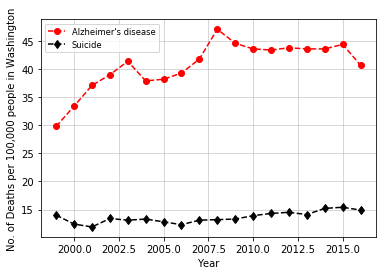

In [31]:
fig, bx = plt.subplots()

bx.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Alzheimer\'s disease'], fmt="--o", color="r",
            alpha=1, label="Alzheimer's disease")
# ax.errorbar(table.index, table["Age-adjusted Death Rate"]['Cancer'], fmt="--^", color="b",
#             alpha=1, label="Cancer")
# ax.errorbar(table.index, table["Age-adjusted Death Rate"]['Heart disease'], fmt="--s", color="g",
#             alpha=1, label="Heart disease")
bx.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Suicide'], fmt="--d", color="k",
            alpha=1, label="Suicide")

# ax.set_xlim((min(table_Tumor.index)-2), (max(table_Tumor.index)+2))

# ax.set_title("Tumor Response to Treatment")
bx.set_xlabel("Year")
bx.set_ylabel(f"No. of Deaths per 100,000 people in {state}")
bx.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save fig
# plt.savefig('Plots/Increasing causes of deaths')

plt.show()

In [135]:
# data["Cause Name"].nunique()
# data["Year"].nunique()
United_States = data.loc[data["State"]=="United States"]
United_States_group = United_States.groupby(['Cause Name']).sum()
United_States_group = United_States_group.sort_values(['Deaths'], ascending=[False])
United_States_group = United_States_group.drop(['Year', 'Age-adjusted Death Rate'], axis=1)
United_States_group

,Deaths
Cause Name,
All causes,44915066
Heart disease,11575183
Cancer,10244536
Stroke,2580140
CLRD,2434726
Unintentional injuries,2177884
Alzheimer's disease,1373412
Diabetes,1316379
Influenza and pneumonia,1038969


In [14]:
Texas = data.loc[data["State"]=="Texas"]
# Texas = Texas.loc[data["Cause Name"]=="Heart disease"]
Texas_group = Texas.groupby(['Year']).sum()
# United_States_group = United_States_group.drop(['Year', 'Age-adjusted Death Rate'], axis=1)
# United_States_group
# Texas = Texas.sort_values(['Year'], ascending=[True])
Texas_group

,Deaths,Age-adjusted Death Rate
Year,,
1999,263162,1594.4
2000,267645,1595.9
2001,272734,1592.5
2002,277237,1588.9
2003,275148,1542.2
2004,270422,1483.2
2005,275887,1471.7
2006,275788,1420.5
2007,280706,1407.4


In [46]:
data["State"].unique()

array(['Vermont', 'District of Columbia', 'Arizona', 'South Dakota',
       'Washington', 'Iowa', 'New York', 'Massachusetts', 'New Jersey',
       'California', 'North Dakota', 'Rhode Island', 'Alaska', 'Oregon',
       'Wyoming', 'Idaho', 'Connecticut', 'Minnesota', 'Illinois',
       'Montana', 'New Hampshire', 'Hawaii', 'Maryland', 'Florida',
       'Colorado', 'Nevada', 'Utah', 'Delaware', 'New Mexico', 'Nebraska',
       'Ohio', 'Michigan', 'Maine', 'Tennessee', 'Pennsylvania', 'Texas',
       'Georgia', 'Louisiana', 'Indiana', 'United States', 'Mississippi',
       'South Carolina', 'Virginia', 'Kansas', 'Wisconsin',
       'North Carolina', 'Alabama', 'Kentucky', 'Missouri', 'Oklahoma',
       'West Virginia', 'Arkansas'], dtype=object)

In [ ]:
data_df = data.loc[data["State"]=="United States"]
United_States_group = United_States.groupby(['Cause Name']).sum()
United_States_group = United_States_group.sort_values(['Deaths'], ascending=[False])
United_States_group = United_States_group.drop(['Year', 'Age-adjusted Death Rate'], axis=1)
United_States_group


In [53]:
data.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

In [93]:
data_df = data[['Cause Name', 'State', 'Deaths']]
grouped_df_state = data_df.groupby(['State', 'Cause Name']).sum()
data_by_state = pd.DataFrame(grouped_df_state)
data_by_state = data_by_state.reset_index()
data_by_state.shape


(572, 3)

In [107]:
# data_by_state[data_by_state['All causes' == True]].index
data_by_state_df = data_by_state.loc[data_by_state["Cause Name"] != "All causes"]
data_by_state_df = data_by_state_df.loc[data_by_state_df["State"] != "United States"]
print(data_by_state_df.shape)
data_by_state_df.head()

(510, 3)


,State,Cause Name,Deaths
1,Alabama,Alzheimer's disease,26637
2,Alabama,CLRD,47778
3,Alabama,Cancer,180780
4,Alabama,Diabetes,24143
5,Alabama,Heart disease,227433


In [141]:
print(data_by_state_df[data_by_state_df['Deaths'].max() == data_by_state_df['Deaths']] )
data_by_state_df.sort_values(['Deaths'], ascending=[False]).head()

         State     Cause Name   Deaths
49  California  Heart disease  1141776


,State,Cause Name,Deaths
49,California,Heart disease,1141776
47,California,Cancer,1002719
357,New York,Heart disease,895080
104,Florida,Heart disease,816162
102,Florida,Cancer,737552


In [140]:
# dbs = data by state
grouped_dbs = data_by_state_df.groupby(['Cause Name', 'State']).sum()
grouped_dbs = grouped_dbs.sort_values(['Deaths'], ascending=[False])
grouped_dbs.head()


Deaths
Cause Name    State              
Heart disease California  1141776
Cancer        California  1002719
Heart disease New York     895080
              Florida      816162
Cancer        Florida      737552

In [148]:
# numbers by percentage 
data_df_prct = data[['Cause Name', 'State', 'Age-adjusted Death Rate']]
grouped_df_state_prct = data_df_prct.groupby(['State', 'Cause Name']).mean()
data_by_state_prct = pd.DataFrame(grouped_df_state_prct)
data_by_state_prct = data_by_state_prct.reset_index()
print(data_by_state_prct.shape)
data_by_state_prct.head()
data_by_state_df_prct = data_by_state_prct.loc[data_by_state_prct["Cause Name"] != "All causes"]
data_by_state_df_prct = data_by_state_df_prct.loc[data_by_state_df_prct["State"] != "United States"]
print(data_by_state_df_prct.shape)
data_by_state_df_prct.head()
data_by_state_df_prct = data_by_state_df_prct.sort_values(['Age-adjusted Death Rate'], ascending=[False])
data_by_state_df_prct

(572, 3)
(510, 3)


,State,Cause Name,Age-adjusted Death Rate
269,Mississippi,Heart disease,279.661111
401,Oklahoma,Heart disease,261.305556
5,Alabama,Heart disease,256.183333
93,District of Columbia,Heart disease,250.450000
203,Louisiana,Heart disease,244.083333
38,Arkansas,Heart disease,242.627778
544,West Virginia,Heart disease,241.622222
192,Kentucky,Heart disease,240.916667
467,Tennessee,Heart disease,238.888889
357,New York,Heart disease,230.577778


In [150]:
print(data_by_state_df_prct[data_by_state_df_prct['State'] == 'California'])

         State               Cause Name  Age-adjusted Death Rate
49  California            Heart disease               187.833333
47  California                   Cancer               161.994444
52  California                   Stroke                46.294444
46  California                     CLRD                39.005556
54  California   Unintentional injuries                29.522222
45  California      Alzheimer's disease                26.094444
48  California                 Diabetes                21.538889
50  California  Influenza and pneumonia                20.233333
53  California                  Suicide                 9.855556
51  California           Kidney disease                 7.761111
